<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Ad_Sales_Prediction_Linear_Regression_Practice/Ad_Sales_Prediction_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('advertising.csv')

# Exploration

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [94]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [95]:
df.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [96]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


# Preprocessing

## Feature Selection

In [97]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [98]:
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


## Feature Scaling

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()

In [116]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [117]:
df_scaled.head(3)

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150


## General Visualisation

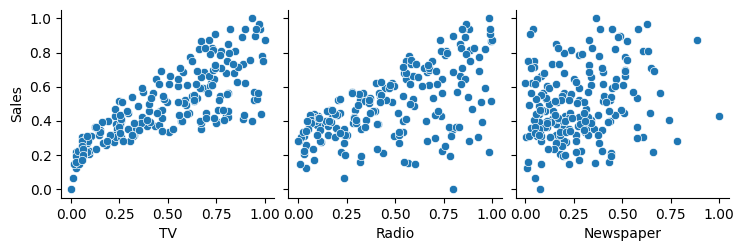

In [44]:
sns.pairplot(
    df_scaled,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    kind='scatter'
)

TV advertisement has the highest correlation to the sales, with newspapers having little to no correlation to sales. Consider droping the newspaper column??

## Data Split

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X = df_scaled.drop(['Sales'], axis=1)
y = df_scaled['Sales']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()

In [123]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

## Predictions vs Target Correlation

In [124]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Predicted vs Actual Sales')

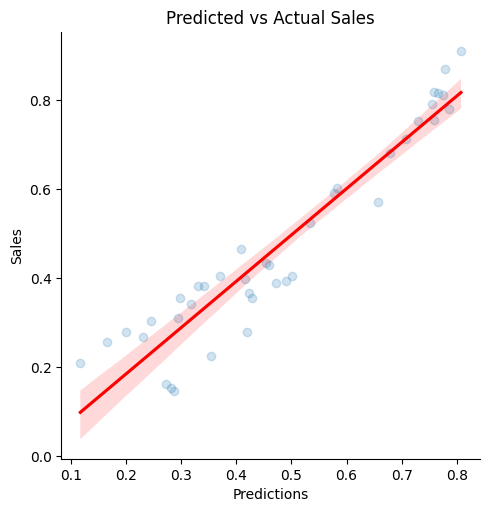

In [127]:
sns.lmplot(
    x='Predictions',
    y='Sales',
    data = pd.DataFrame(
        {
            'Sales': y_test,
            'Predictions': predictions
        }
    ),
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
plt.xlabel = 'Predicted Sales'
plt.ylabel = 'Sales'
plt.title('Predicted vs Actual Sales')


## Distribution of Errors

In [125]:
residuals = y_test - predictions

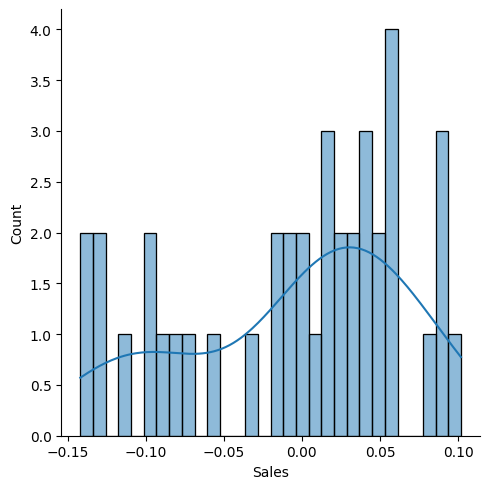

In [126]:
sns.displot(
    residuals,
    bins=30,
    kde=True
)

## Error

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))

Mean Squared Error:  0.004863829141714231
